# Visualizing Waveforms

In this notebook, I will be visualizing waveforms from the podcast audio data in order to gain new insights

In [1]:
import librosa
import numpy as np
from librosa import display
from matplotlib import pyplot as plt
import boto3
from pydub import AudioSegment
from pydub.playback import play
import io
from pocketsphinx import AudioFile, get_model_path, get_data_path
%matplotlib inline

In [2]:
y, sr = librosa.load('billboard_part.mp3')

/home/hazel/anaconda3/envs/podcasts/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [4]:
print(y)

[-6.20476785e-05 -1.13894406e-04 -7.82471398e-05 ...  4.54424229e-03
  4.47647600e-03  4.65745339e-03]


Text(0.5, 1.0, 'Waveplot of Podcast Episode Snippet')

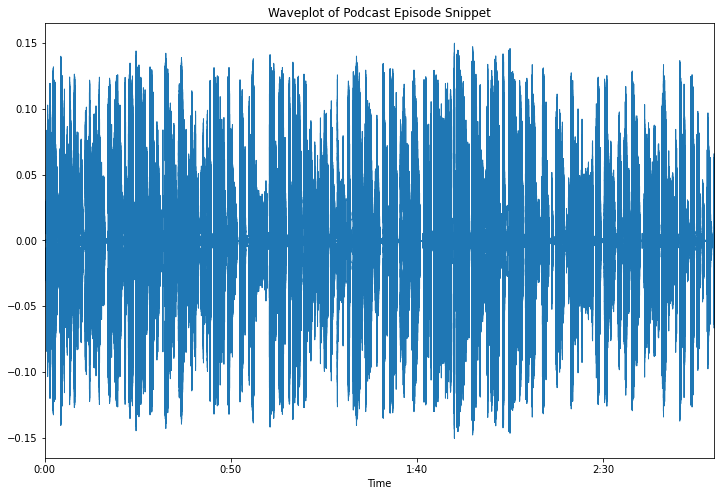

In [5]:
plt.figure(figsize=(12, 8))
display.waveplot(y, sr=sr)
plt.title('Waveplot of Podcast Episode Snippet')

In [6]:

def convert_text_to_speech(text, filename):
    polly = boto3.client('polly')
    response = polly.synthesize_speech(Text=text,
                                        OutputFormat='mp3',
                                        VoiceId='Joanna')
    output = response['AudioStream'].read()
    tts = AudioSegment.from_file(io.BytesIO(output), format="mp3")
    play(tts)
    audio_file = open(filename, 'wb')
    audio_file.write(output)
    audio_file.close()

In [7]:
convert_text_to_speech('billboard', 'keyword_billboard.mp3')

In [ ]:
# make waveform for billboard keyword from polly
# further splice audio to find all instances of the keyword
# compare the waveforms from the spliced podcast episode and polly text to speech. are they similar?
# research a way to match audio using the podcast episode and polly text to speech

In [8]:
y2, sr = librosa.load('keyword_billboard.mp3')

/home/hazel/anaconda3/envs/podcasts/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Text(0.5, 1.0, 'Waveplot of Polly Generated Keyword')

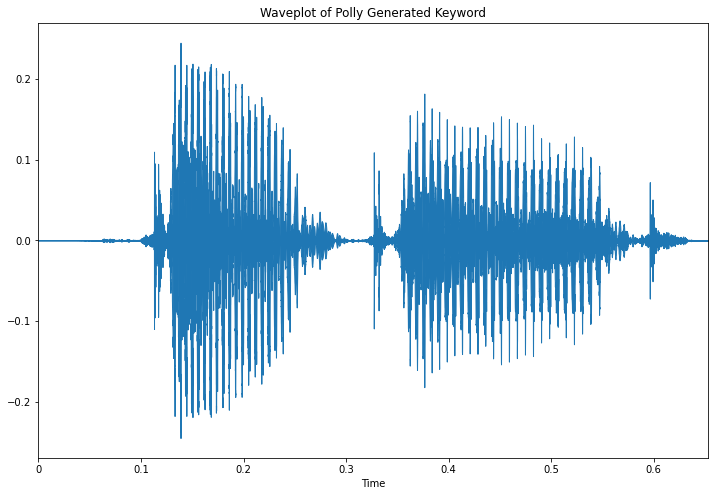

In [9]:
plt.figure(figsize=(12, 8))
display.waveplot(y2, sr=sr)
plt.title('Waveplot of Polly Generated Keyword')

In [10]:
audio_snippet = './billboard_part.mp3'
first_instance_start = 48.7 * 1000
first_instance_end = 50 * 1000
second_instance_start = 1.11 * 60 * 1000
second_instance_end = 1.13 * 60 * 1000
third_instance_start = 1.39 * 60 * 1000
third_instance_end = 1.42 * 60 * 1000
# fourth_instance_start = 1.45 * 60 * 100
# fourth_instance_end = 1.55 * 60 * 1000

In [11]:
keyword_snippet = AudioSegment.from_file(audio_snippet)
new_snippet = keyword_snippet[first_instance_start:first_instance_end]
new_snippet.export('./billboard_snippets.mp3', format='mp3')

<_io.BufferedRandom name='./billboard_snippets.mp3'>

In [12]:
y_snippet, sr = librosa.load('./billboard_snippets.mp3')

/home/hazel/anaconda3/envs/podcasts/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Text(0.5, 1.0, "Waveform of Keyword 'Billboard' from podcast episode")

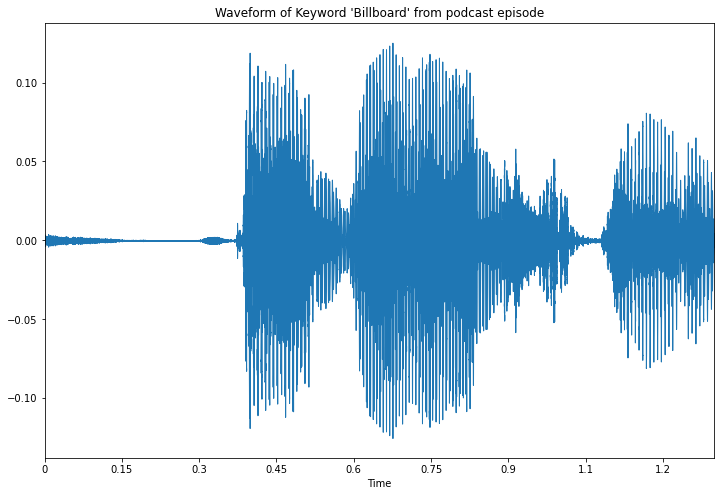

In [13]:
plt.figure(figsize=(12, 8))
display.waveplot(y_snippet, sr=sr)
plt.title("Waveform of Keyword 'Billboard' from podcast episode")

Text(0.5, 1.0, 'Waveform of Keyword Spoken in Podcast Episode')

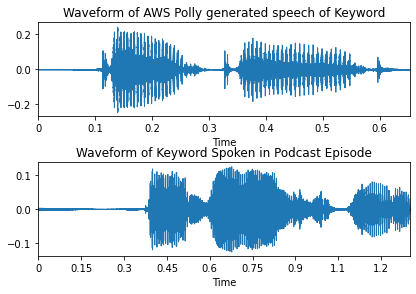

In [14]:
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.waveplot(y2, sr=sr)
plt.title("Waveform of AWS Polly generated speech of Keyword")
plt.subplot(2, 1, 2)
plt.tight_layout()
librosa.display.waveplot(y_snippet, sr=sr)
plt.title("Waveform of Keyword Spoken in Podcast Episode")

In [14]:
def get_keyword_timestamps(filename, start_time, end_time):
    """
    Takes an audio file and splices it based on some keyword
    uses the start times and end times of all instances of the 
    the keyword
    """
    audio_sound_bite = AudioSegment.from_file(filename)
    audio_snippet = audio_sound_bite[start_time:end_time]
    return audio_snippet

In [19]:
get_keyword_timestamps(audio_snippet, first_instance_start, first_instance_end)

In [29]:
from pocketsphinx import AudioFile, get_model_path, get_data_path

model_path = get_model_path()
data_path = get_data_path()

config = {
    'verbose': False,
    'audio_file': './aa7910352e303aaf37006bd036de4cdc.mp3',
    'buffer_size': 2048,
    'no_search': False,
    'full_utt': False,
    'hmm': os.path.join(model_path, 'en-us'),
    'lm': os.path.join(model_path, 'en-us.lm.bin'),
    'dict': os.path.join(model_path, 'cmudict-en-us.dict')
}

audio = AudioFile(**config)
for phrase in audio:
    print(phrase)
